#### DWM-07P: Using only summary() statistics to evolve the rules for classification of iris.csv for the maximum possible range of values. Print the rules and print the range of values which cannot be classified using only the summary statistics. For the unclassified range of values, use Artificial Neural Networks (ANN) to classify. Write the outcome.

### Getting Started

In [411]:
import math
import random
import matplotlib.pyplot as plt

In [412]:
# Set a fixed seed for random to ensure reproducibily
random.seed(0)

In [413]:
def scatter(*args):
    """
    Draw a scatter plot for one or more lists of points.

    Parameters:
    *args (list): One or more lists of points to be plotted.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))

    for idx, points_list in enumerate(args):
        x_values = range(1, len(points_list) + 1)
        y_values = points_list
        plt.scatter(x_values, y_values)

    plt.show()

### 1. Preprocessing

In [414]:
def read_csv(filename):
    """
    Purpose: Read data from a CSV file and extract relevant information.

    Description of Input Parameters:
    - filename: Name of the CSV file to be read.

    Description of Return Data:
    - data: List of lists containing extracted data from the CSV file.

    Libraries Used: None
    """
    try:
        lines = open(filename, "r").read().split("\n")
        data = []
        for line in lines[1:]:
            if line.replace(" ", "") != "":
                words = line.split(",")
                data.append([float(words[1]), float(words[2]), float(words[3]), float(words[4]), words[5][1:-1]])
        return data
    
    except Exception as exception:
        print(exception)
        return None

In [415]:
def encode(data, lookup):
    """
    Purpose: Encode categorical data in the dataset using a lookup table.

    Description of Input Parameters:
    - data: List of lists representing the dataset.
    - lookup: Dictionary mapping categorical values to encoded values.

    Description of Return Data: None

    Libraries Used: None
    """
    try:
        for row in data:
            row[-1] = lookup[row[-1]]
    except Exception as exception:
        print(exception)

In [416]:
def head(data, rows=5):
    """
    Purpose: Display the first few rows of the dataset.

    Description of Input Parameters:
    - data: List of lists representing the dataset.
    - rows: Number of rows to display (default is 5).

    Description of Return Data: None

    Libraries Used: None
    """
    for i in range(rows):
        try:
            print(data[i])
        except:
            break

In [417]:
def shuffle(data):
    """
    Purpose: Shuffle the order of rows in the dataset.

    Description of Input Parameters:
    - data: List of lists representing the dataset.

    Description of Return Data: None

    Libraries Used: random
    """
    try:
        random.shuffle(data)
    except Exception as exception:
        print(exception)

In [418]:
def split_data(data, split_ratio):
    """
    Purpose: Split the dataset into training and testing sets.

    Description of Input Parameters:
    - data: List of lists representing the dataset.
    - split_ratio: Proportion of data to be allocated to the training set.

    Description of Return Data:
    - train_set: Subset of data for training.
    - test_set: Subset of data for testing.

    Libraries Used: None
    """
    try:
        train_size = int(len(data) * split_ratio)
        train_set = data[0:train_size]
        test_set = data[train_size:]
        return train_set, test_set
    
    except Exception as exception:
        print(exception)
        return None, None

In [419]:
data = read_csv("../data/iris.csv")

head(data)

[5.1, 3.5, 1.4, 0.2, 'setosa']
[4.9, 3.0, 1.4, 0.2, 'setosa']
[4.7, 3.2, 1.3, 0.2, 'setosa']
[4.6, 3.1, 1.5, 0.2, 'setosa']
[5.0, 3.6, 1.4, 0.2, 'setosa']


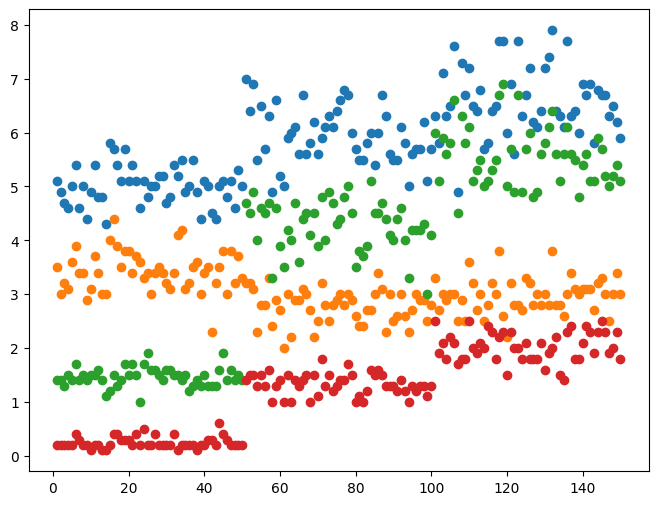

In [420]:
scatter([row[0] for row in data], [row[1] for row in data], [row[2] for row in data], [row[3] for row in data])

In [421]:
# Since there are no strict outliers, no need to handle them. Also, no absent data values, hence no requirement of handling missing data.

lookup = {"setosa": 0, "versicolor": 1, "virginica": 2}
encode(data, lookup)
shuffle(data)

head(data)

[5.2, 3.5, 1.5, 0.2, 0]
[7.0, 3.2, 4.7, 1.4, 1]
[5.5, 2.3, 4.0, 1.3, 1]
[6.3, 2.7, 4.9, 1.8, 2]
[5.7, 3.0, 4.2, 1.2, 1]


In [422]:
split_ratio = 0.8
train_set, test_set = split_data(data, split_ratio)

### 2. Train the ANN Model

In [423]:
def initialize_network(n_inputs, n_hidden, n_outputs):
    """
    Purpose: Initialize a neural network with random weights.

    Description of Input Parameters:
    - n_inputs: Number of input nodes.
    - n_hidden: Number of nodes in the hidden layer.
    - n_outputs: Number of output nodes.

    Description of Return Data:
    - network: Initialized neural network.

    Libraries Used: random
    """
    network = []
    hidden_layer = [{'weights': [random.uniform(-0.5, 0.5) for _ in range(n_inputs + 1)]} for _ in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights': [random.uniform(-0.5, 0.5) for _ in range(n_hidden + 1)]} for _ in range(n_outputs)]
    network.append(output_layer)
    return network

In [424]:
def activate(weights, inputs):
    """
    Purpose: Calculate the activation of a neuron.

    Description of Input Parameters:
    - weights: List of weights for the neuron.
    - inputs: List of input values.

    Description of Return Data:
    - activation: Calculated activation value.

    Libraries Used: None
    """
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [425]:
def sigmoid(activation):
    """
    Purpose: Compute the sigmoid activation function.

    Description of Input Parameters:
    - activation: Input value to the sigmoid function.

    Description of Return Data:
    - sigmoid_value: Result of the sigmoid function.

    Libraries Used: math
    """
    return 1.0 / (1.0 + math.exp(-activation))

In [426]:
def forward_propagate(network, row):
    """
    Purpose: Perform forward propagation through the neural network.

    Description of Input Parameters:
    - network: Neural network model.
    - row: Input data row.

    Description of Return Data:
    - inputs: Output values from the last layer.

    Libraries Used: None
    """
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = sigmoid(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [427]:
def backward_propagate_error(network, expected):
    """
    Purpose: Backpropagate error and update neuron deltas.

    Description of Input Parameters:
    - network: Neural network model.
    - expected: Expected output values.

    Description of Return Data: None

    Libraries Used: None
    """
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        if i != len(network) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j, neuron in enumerate(layer):
                errors.append(expected[j] - neuron['output'])
        for j, neuron in enumerate(layer):
            neuron['delta'] = errors[j] * neuron['output'] * (1.0 - neuron['output'])

In [428]:
def update_weights(network, row, learning_rate):
    """
    Purpose: Update weights of neurons based on backpropagated error.

    Description of Input Parameters:
    - network: Neural network model.
    - row: Input data row.
    - learning_rate: Learning rate for weight updates.

    Description of Return Data: None

    Libraries Used: None
    """
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += learning_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += learning_rate * neuron['delta']

In [429]:
def train_network(network, train, learning_rate, n_epoch, n_outputs, verbose=False):
    """
    Purpose: Train the neural network using backpropagation.

    Description of Input Parameters:
    - network: Neural network model.
    - train: Training dataset.
    - learning_rate: Learning rate for weight updates.
    - n_epoch: Number of training epochs.
    - n_outputs: Number of output nodes.
    - verbose: Boolean flag for printing training progress.

    Description of Return Data: None

    Libraries Used: None
    """
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0] * n_outputs
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, learning_rate)
        if verbose:
            print(f'> epoch={epoch+1}, learning_rate={learning_rate}, error={sum_error}')

In [430]:
def predict(network, row):
    """
    Purpose: Make predictions using the trained neural network.

    Description of Input Parameters:
    - network: Trained neural network model.
    - row: Input data row for prediction.

    Description of Return Data:
    - prediction: Predicted class label.

    Libraries Used: None
    """
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [431]:
def accuracy_metric(actual, predicted):
    """
    Purpose: Calculate the accuracy metric for model evaluation.

    Description of Input Parameters:
    - actual: List of actual class labels.
    - predicted: List of predicted class labels.

    Description of Return Data:
    - accuracy: Accuracy percentage.

    Libraries Used: None
    """
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [432]:
def check_accuracy(network, dataset):
    """
    Purpose: Check accuracy of the trained neural network on a dataset.

    Description of Input Parameters:
    - network: Trained neural network model.
    - dataset: Dataset for accuracy evaluation.

    Description of Return Data:
    - accuracy: Accuracy percentage.

    Libraries Used: None
    """
    predictions = []
    actual = [row[-1] for row in dataset]
    for row in dataset:
        prediction = predict(network, row)
        predictions.append(prediction)
    return accuracy_metric(actual, predictions)

In [433]:
# Initialize network and train it
n_inputs = len(train_set[0]) - 1
n_outputs = len(set(row[-1] for row in train_set))
learning_rate = 0.1
n_epochs = 100
network = initialize_network(n_inputs, 8, n_outputs)  # Initialize a neural network with specified parameters
train_network(network, train_set, learning_rate, n_epochs, n_outputs, verbose=False)  # Train the neural network

### 3. Test the trained Model

In [434]:
print("Train Accuracy:", check_accuracy(network, train_set))  # Check accuracy on the training set
print("Test Accuracy:", check_accuracy(network, test_set))  # Check accuracy on the testing set

Train Accuracy: 97.5
Test Accuracy: 100.0


In [435]:
print(lookup)

unclassified = [[5.5, 2.3, 4.0, 1.3, 'versicolor'], [5.7, 2.8, 4.5, 1.3, 'versicolor'], [4.9, 2.4, 3.3, 1.0, 'versicolor'], [6.6, 2.9, 4.6, 1.3, 'versicolor'], [5.0, 2.0, 3.5, 1.0, 'versicolor'], [6.0, 2.2, 4.0, 1.0, 'versicolor'], [5.6, 2.9, 3.6, 1.3, 'versicolor'], [5.8, 2.7, 4.1, 1.0, 'versicolor'], [5.6, 2.5, 3.9, 1.1, 'versicolor'], [6.1, 2.8, 4.0, 1.3, 'versicolor'], [6.1, 2.8, 4.7, 1.2, 'versicolor'], [6.4, 2.9, 4.3, 1.3, 'versicolor'], [5.7, 2.6, 3.5, 1.0, 'versicolor'], [5.5, 2.4, 3.8, 1.1, 'versicolor'], [5.5, 2.4, 3.7, 1.0, 'versicolor'], [5.8, 2.7, 3.9, 1.2, 'versicolor'], [6.3, 2.3, 4.4, 1.3, 'versicolor'], [5.6, 3.0, 4.1, 1.3, 'versicolor'], [5.5, 2.5, 4.0, 1.3, 'versicolor'], [5.5, 2.6, 4.4, 1.2, 'versicolor'], [5.8, 2.6, 4.0, 1.2, 'versicolor'], [5.0, 2.3, 3.3, 1.0, 'versicolor'], [5.6, 2.7, 4.2, 1.3, 'versicolor'], [5.7, 3.0, 4.2, 1.2, 'versicolor'], [5.7, 2.9, 4.2, 1.3, 'versicolor'], [6.2, 2.9, 4.3, 1.3, 'versicolor'], [5.1, 2.5, 3.0, 1.1, 'versicolor'], [5.7, 2.8, 4.1, 1.3, 'versicolor'], [5.8, 2.7, 5.1, 1.9, 'virginica'], [4.9, 2.5, 4.5, 1.7, 'virginica'], [6.5, 3.2, 5.1, 2.0, 'virginica'], [5.7, 2.5, 5.0, 2.0, 'virginica'], [5.8, 2.8, 5.1, 2.4, 'virginica'], [6.0, 2.2, 5.0, 1.5, 'virginica'], [5.6, 2.8, 4.9, 2.0, 'virginica'], [6.3, 2.7, 4.9, 1.8, 'virginica'], [6.2, 2.8, 4.8, 1.8, 'virginica'], [6.1, 3.0, 4.9, 1.8, 'virginica'], [6.3, 2.8, 5.1, 1.5, 'virginica'], [6.0, 3.0, 4.8, 1.8, 'virginica'], [6.9, 3.1, 5.1, 2.3, 'virginica'], [5.8, 2.7, 5.1, 1.9, 'virginica'], [6.3, 2.5, 5.0, 1.9, 'virginica'], [5.9, 3.0, 5.1, 1.8, 'virginica']]
for i in unclassified:
    print(i, "=> Predicted Class:", predict(network, i[:-1]))  # Make predictions for each sample

{'setosa': 0, 'versicolor': 1, 'virginica': 2}
[5.5, 2.3, 4.0, 1.3, 'versicolor'] => Predicted Class: 1
[5.7, 2.8, 4.5, 1.3, 'versicolor'] => Predicted Class: 1
[4.9, 2.4, 3.3, 1.0, 'versicolor'] => Predicted Class: 1
[6.6, 2.9, 4.6, 1.3, 'versicolor'] => Predicted Class: 1
[5.0, 2.0, 3.5, 1.0, 'versicolor'] => Predicted Class: 1
[6.0, 2.2, 4.0, 1.0, 'versicolor'] => Predicted Class: 1
[5.6, 2.9, 3.6, 1.3, 'versicolor'] => Predicted Class: 1
[5.8, 2.7, 4.1, 1.0, 'versicolor'] => Predicted Class: 1
[5.6, 2.5, 3.9, 1.1, 'versicolor'] => Predicted Class: 1
[6.1, 2.8, 4.0, 1.3, 'versicolor'] => Predicted Class: 1
[6.1, 2.8, 4.7, 1.2, 'versicolor'] => Predicted Class: 1
[6.4, 2.9, 4.3, 1.3, 'versicolor'] => Predicted Class: 1
[5.7, 2.6, 3.5, 1.0, 'versicolor'] => Predicted Class: 1
[5.5, 2.4, 3.8, 1.1, 'versicolor'] => Predicted Class: 1
[5.5, 2.4, 3.7, 1.0, 'versicolor'] => Predicted Class: 1
[5.8, 2.7, 3.9, 1.2, 'versicolor'] => Predicted Class: 1
[6.3, 2.3, 4.4, 1.3, 'versicolor'] => Pre